In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
df = pd.read_csv('./Data/rpi_data_compact.csv')
df.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         680 non-null    int64  
 1   Ping (ms)          679 non-null    object 
 2   Download (Mbit/s)  679 non-null    object 
 3   Upload (Mbit/s)    673 non-null    float64
 4   Date               673 non-null    object 
 5   Time               673 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 32.0+ KB


In [4]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         673 non-null    int64  
 1   Ping (ms)          673 non-null    object 
 2   Download (Mbit/s)  673 non-null    object 
 3   Upload (Mbit/s)    673 non-null    float64
 4   Date               673 non-null    object 
 5   Time               673 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 36.8+ KB


###### Было удалено 7 записей с NUL значениями.

In [5]:
df[['Ping (ms)', 'Download (Mbit/s)']] = df[['Ping (ms)', 'Download (Mbit/s)']].apply(pd.to_numeric)
df.dtypes

Unnamed: 0             int64
Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [6]:
df = df.reindex(columns = list(df.columns)[1::][::-1])
df.head()

,Time,Date,Upload (Mbit/s),Download (Mbit/s),Ping (ms)
0,13:36:25,2016-11-24,14.31,91.80,26.992
1,13:36:55,2016-11-24,14.12,88.19,24.532
2,13:37:25,2016-11-24,14.11,59.86,20.225
3,13:37:57,2016-11-24,14.22,91.81,19.332
4,13:38:27,2016-11-24,14.08,92.05,22.494


In [7]:
df.to_csv('./Data/rpi_data_processed.csv')

In [8]:
means = df.mean(axis = 0) 
stands = df.std(axis = 0)

# Place mean and std for each column in a tuple
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766717 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.465647031815227 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031766 Mbit/s


In [9]:
mins = df[df.columns[2::]].min()
maxs = df[df.columns[2::]].max()

# Place mean and std for each column in a tuple
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

# Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [10]:
df.describe()

,Upload (Mbit/s),Download (Mbit/s),Ping (ms)
count,673.000000,673.000000,673.000000
mean,13.697608,90.449212,21.115452
std,1.080471,3.465647,5.161225
min,6.210000,58.480000,16.167000
25%,13.640000,90.220000,19.115000
50%,13.980000,91.560000,20.322000
75%,14.180000,92.070000,21.843000
max,14.550000,92.870000,76.528000


In [11]:
# Find the min and max ping time
argmin_ping = df['Ping (ms)'].argmin()
argmax_ping = df['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = df['Download (Mbit/s)'].argmin()
argmax_download = df['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df['Upload (Mbit/s)'].argmin()
argmax_upload = df['Upload (Mbit/s)'].argmax()

In [12]:
df_test = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df_test.head()

,field_1,field_2
0,0,0
1,1,2


In [13]:
df_test.iloc[1]['field_1']

1

In [16]:
#Print the corresponding Date and Time
print('Ping measure reached minimum on {} at {}'.format(df.iloc[argmin_ping]['Date'], df.iloc[argmin_ping]['Time']))
print('Download measure reached minimum on {} at {}'.format(df.iloc[argmin_download]['Date'], df.iloc[argmin_download]['Time']))
print('Upload measure reached minimum on {} at {} \n'.format(df.iloc[argmin_upload]['Date'], df.iloc[argmin_upload]['Time']))

print('Ping measure reached maximum on {} at {}'.format(df.iloc[argmax_ping]['Date'], df.iloc[argmax_ping]['Time']))
print('Download measure reached maximum on {} at {}'.format(df.iloc[argmax_download]['Date'], df.iloc[argmax_download]['Time']))
print('Upload measure reached maximum on {} at {}'.format(df.iloc[argmax_upload]['Date'], df.iloc[argmax_upload]['Time']))

Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 14:57:55
Upload measure reached minimum on 2016-11-24 at 17:31:47 

Ping measure reached maximum on 2016-11-24 at 17:30:06
Download measure reached maximum on 2016-11-24 at 17:02:49
Upload measure reached maximum on 2016-11-24 at 18:02:15


In [17]:
df_corr = df.corr()
df_corr

,Upload (Mbit/s),Download (Mbit/s),Ping (ms)
Upload (Mbit/s),1.000000,0.083690,-0.463099
Download (Mbit/s),0.083690,1.000000,-0.045626
Ping (ms),-0.463099,-0.045626,1.000000


In [18]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: 0.08368996933724965
Correlation coefficient between ping and upload: -0.46309871383001777
Correlation coefficient between upload and download: -0.0456261102583789


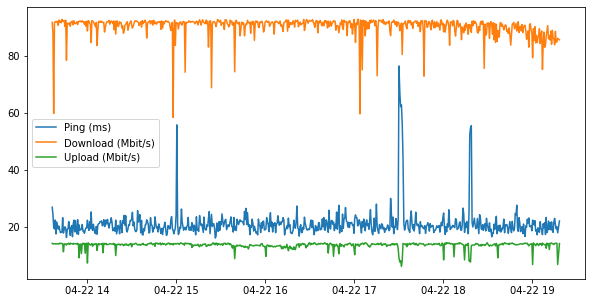

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df['Time'])


# Plot three curves of different colors
ax.plot(t, df['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

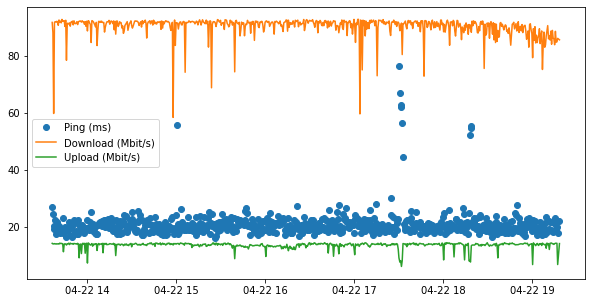

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df['Time'])

# Plot three curves of different colors
ax.plot(t, df['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

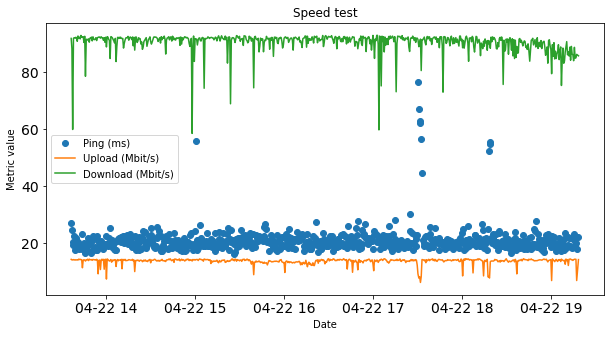

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves
t = pd.to_datetime(df['Time'])
ax.plot(t, df['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert legend
ax.legend()

# Add axis labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Metric value")
ax.set_title("Speed test")

# Change tick size
ax.tick_params(labelsize=14)

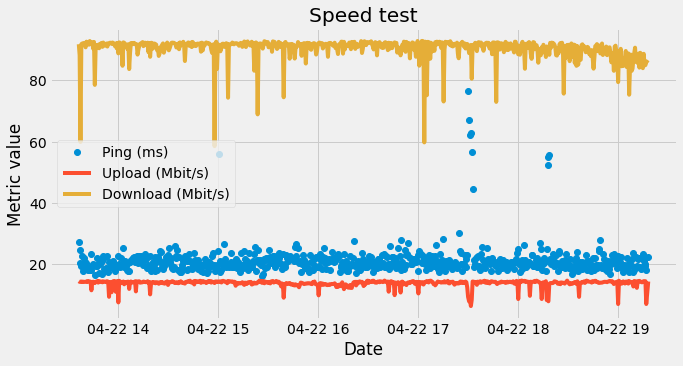

In [26]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot three curves
    t = pd.to_datetime(df['Time'])
    ax.plot(t, df['Ping (ms)'], 'o', label='Ping (ms)')
    ax.plot(t, df['Upload (Mbit/s)'], label='Upload (Mbit/s)')
    ax.plot(t, df['Download (Mbit/s)'], label='Download (Mbit/s)')

    # Insert legend
    ax.legend(loc = 'center left')

    # Add axis labels and title
    ax.set_xlabel("Date")
    ax.set_ylabel("Metric value")
    ax.set_title("Speed test")

    # Change tick size
    ax.tick_params(labelsize=14)

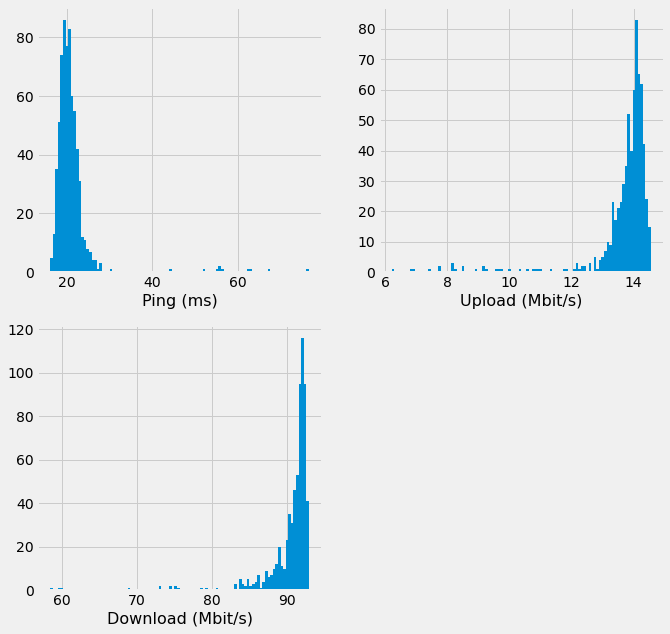

In [27]:
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)